# Sumowanie liczb pojedynczej precyzji

In [3]:
from numpy import float32
from matplotlib import pyplot as plt
import time

In [4]:
def absolute_error(number, approximation):
    return abs(number - approximation)


def relative_error(number, approximation):
    return abs(number - approximation) / number


def iterative_sum(tab):
    sum = float32(0)
    for i in tab:
        sum += i
    return sum

In [6]:
val = float32(0.53125)
numbers = [val] * 10 ** 7
sum32 = iterative_sum(numbers)
original_sum = val * 10 ** 7

print('Wartość prawidłowa: ', original_sum)
print('Wartość uzyskana po zsumowaniu:', sum32)
print('Błąd bezwzględny:', absolute_error(original_sum, sum32))
print('Błąd względny:', relative_error(original_sum, sum32) * 100, '%')

Wartość prawidłowa:  5312500.0
Wartość uzyskana po zsumowaniu: 5030840.5
Błąd bezwzględny: 281659.5
Błąd względny: 5.301825882352941 %


Błąd względny jest tak duży, ponieważ dodajemy bardzo małą liczbę do coraz większej sumy.

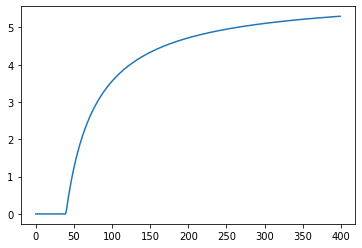

In [19]:
def relative_error_plot(numbers):
    sum = float32(0)
    sum2 = 0
    x = 0
    tab = []
    for i in numbers:
        sum += i
        sum2 += i
        if x % 25000 == 0:
            tab.append(relative_error(sum2, sum) * 100)
        x += 1
    plt.plot(tab)
    plt.show()
relative_error_plot(numbers)

In [9]:
def recursive_sum(xs):
    length = len(xs)
    if length == 0:
        return 0
    if length == 1:
        return xs[0]
    else:
        return recursive_sum(xs[:length//2]) + recursive_sum(xs[length//2:])
sum3 = recursive_sum(numbers)

In [18]:
print('Wartość prawidłowa: ', original_sum)
print('Suma obliczona rekurencyjnie: ', sum3)
print('Błąd bezwzględny: ', absolute_error(original_sum, sum3))
print('Błąd względny: ', relative_error(original_sum, sum3) * 100, '%')

Wartość prawidłowa:  5312500.0
Suma obliczona rekurencyjnie:  5312500.0
Błąd bezwzględny:  0.0
Błąd względny:  0.0 %


Błąd względny jest równy 0 %, ponieważ rekurencyjnie dodajemy do siebie bardzo podobne liczby. Bity mantysy nie są tracone.

Jednak jeżeli w tablicy będą obok siebie liczby bardzo duże i bardzo małe to błąd wzrośnie.

In [23]:
def not_zero_error():
    x = float32(0.0001)
    y = float32(10000)
    numbers2 = []
    sum64 = float(0)
    for i in range(10 ** 7 + 1):
        if i % 2 == 0:
            numbers2.append(x)
            sum64 += x
        else:
            numbers2.append(y)
            sum64 += y
    sum4 = recursive_sum(numbers2)
    print('Suma obliczona rekurencyjnie: ', sum4)
    print('Wartość prawidłowa: ', sum64)
    print('Błąd bezwzględny: ', absolute_error(sum64, sum4))
    print('Błąd względny: ', relative_error(sum64, sum4) * 100, '%')
not_zero_error()

Suma obliczona rekurencyjnie:  50000003000.0
Wartość prawidłowa:  50000000496.69094
Błąd bezwzględny:  2575.3090591430664
Błąd względny:  5.150618067120826e-06 %


# Algorytm Kahana

In [14]:
def Kahan_sum (tab, function):
    sum = function(0.0)
    err = function(0.0)
    for i in tab:
        y = function(i - err)
        tmp = function(sum + y)
        err = function((tmp - sum) - y)
        sum = tmp
    return sum
# (tmp - sum) odzyskuje wyższe bity y 
# odjęcie y odzyskuje niższe bity y
kahan_sum = Kahan_sum(numbers, float32)
original_sum = val * 10 ** 7

In [24]:
print("Suma prawidłowa: ", original_sum)
print("Suma obliczona algorytmem Kahana: ", kahan_sum)
print('Błąd bezwzględny: ', absolute_error(original_sum, kahan_sum))
print('Błąd względny: ', relative_error(original_sum, kahan_sum) * 100, '%')

Suma prawidłowa:  5312500.0
Suma obliczona algorytmem Kahana:  5312500.0
Błąd bezwzględny:  0.0
Błąd względny:  0.0 %


Algorytm Kahana w każdej iteracji pętli przechowuje w zmiennej err bity, które zostały utracone przez dodawanie małych i dużych liczb. W kolejnej iteracji są one uwzględniane, dzięki czemu błąd zdecydowanie zmalał.

In [17]:
def compare_time():
    start = time.time() * 1000
    iterative_sum(numbers)
    end = time.time() * 1000
    time_sum1 = (end - start).__round__(2)
    print(f"Czas dla sumy obliczonej iteracyjnie: {time_sum1} milisekund")
    start = time.time() * 1000
    Kahan_sum(numbers, float32)
    end = time.time() * 1000
    time_sum1 = (end - start).__round__(2)
    print(f"Czas dla sumy obliczonej algorytmem Kahana: {time_sum1} milisekund")
    start = time.time() * 1000
    recursive_sum(numbers)
    end = time.time() * 1000
    time_recursive_sum = (end - start).__round__(2)
    print(f"Czas dla sumy obliczonej rekurencyjnie: {time_recursive_sum} milisekund")
compare_time()

Czas dla sumy obliczonej iteracyjnie: 1253.96 milisekund
Czas dla sumy obliczonej algorytmem Kahana: 20165.82 milisekund
Czas dla sumy obliczonej rekurencyjnie: 10895.82 milisekund


# Sumy częściowe

In [25]:
tab_s = [float32(2), float32(3.6667), float32(5), float32(7.2), float32(10)]
tab_n = [50, 100, 200, 500, 1000]


def zeta_riemann_forward(s, n, function):
    sum = function(0)
    for k in range(1, n + 1, 1):
        sum += function(1 / (k ** s))
    return sum


def zeta_riemann_backward(s, n, function):
    backward_sum = function(0)
    for k in range(n, 0, -1):
        backward_sum += function(1 / (k ** s))
    return backward_sum


def eta_dirichlet_forward(s, n, function):
    sum = function(0)
    for k in range(1, n + 1, 1):
        sum += function((-1) ** (k - 1) * 1 / (k ** s))
    return sum


def eta_dirichlet_backward(s, n, function):
    backward_sum = function(0)
    for k in range(n, 0, -1):
        backward_sum += function((-1) ** (k - 1) * 1 / (k ** s))
    return backward_sum

In [32]:
def compare_precision(tab_n, tab_s):
    for s in tab_s:
        for n in tab_n:
            riemann_sum32_f = zeta_riemann_forward(s, n, float32)
            riemann_sum32_b = zeta_riemann_backward(s, n, float32)
            riemann_sum64_f = zeta_riemann_forward(s, n, float)
            riemann_sum64_b = zeta_riemann_backward(s, n, float)
            dirichlet_sum32_f = eta_dirichlet_forward(s, n, float32)
            dirichlet_sum32_b = eta_dirichlet_backward(s, n, float32)
            dirichlet_sum64_f = eta_dirichlet_forward(s, n, float)
            dirichlet_sum64_b = eta_dirichlet_backward(s, n, float)

            print("s: ", s, "n: ", n)
            print("Riemann dla float32")
            print("Suma obliczona w przód: ", riemann_sum32_f)
            print("Suma obliczona wstecz: ", riemann_sum32_b)
            print("Różnica między powyższymi: ", abs(riemann_sum32_b - riemann_sum32_f))
            print("\n")
            print("Riemann dla float64")
            print("Suma obliczona w przód: ", riemann_sum64_f)
            print("Suma obliczona wstecz: ", riemann_sum64_b)
            print("Różnica między powyższymi: ", abs(riemann_sum64_b - riemann_sum64_f))
            print("\n")
            print("Riemann")
            print("Różnica między float32 i float64 w przód: ", abs(riemann_sum64_f - riemann_sum32_f))
            print("Różnica między float32 i float64 wstecz: ", abs(riemann_sum64_b - riemann_sum32_b))
            print("\n")
            print("Dirichlet dla float32")
            print("Suma obliczona w przód: ", dirichlet_sum32_f)
            print("Suma obliczona wstecz: ", dirichlet_sum32_b)
            print("Różnica między powyższymi: ", abs(dirichlet_sum32_b - dirichlet_sum32_f))
            print("\n")
            print("Dirichlet dla float64")
            print("Suma obliczona w przód: ", dirichlet_sum64_f)
            print("Suma obliczona wstecz: ", dirichlet_sum64_b)
            print("Różnica między powyższymi: ", abs(dirichlet_sum64_b - dirichlet_sum64_f))
            print("\n")
            print("Dirichlet")
            print("Różnica między float32 i float64 w przód: ", abs(dirichlet_sum64_f - dirichlet_sum32_f))
            print("Różnica między float32 i float64 wstecz: ", abs(dirichlet_sum64_b - dirichlet_sum32_b))
            print("\n")
            print("-----------------------------------------")
compare_precision(tab_n, tab_s)

s:  2.0 n:  50
Riemann dla float32
Suma obliczona w przód:  1.6251329
Suma obliczona wstecz:  1.6251327
Różnica między powyższymi:  2.3841858e-07


Riemann dla float64
Suma obliczona w przód:  1.625132733621529
Suma obliczona wstecz:  1.6251327336215293
Różnica między powyższymi:  2.220446049250313e-16


Riemann
Różnica między float32 i float64 w przód:  1.8473632001914098e-07
Różnica między float32 i float64 wstecz:  5.368225930446613e-08


Dirichlet dla float32
Suma obliczona w przód:  0.822271
Suma obliczona wstecz:  0.82227105
Różnica między powyższymi:  5.9604645e-08


Dirichlet dla float64
Suma obliczona w przód:  0.8222710318260295
Suma obliczona wstecz:  0.8222710318260289
Różnica między powyższymi:  5.551115123125783e-16


Dirichlet
Różnica między float32 i float64 w przód:  4.240799966748199e-08
Różnica między float32 i float64 wstecz:  1.719664566302015e-08


-----------------------------------------
s:  2.0 n:  100
Riemann dla float32
Suma obliczona w przód:  1.634984
Suma 

Różnica między float32 i float64 wstecz:  2.1852989640080978e-08


-----------------------------------------
s:  5.0 n:  500
Riemann dla float32
Suma obliczona w przód:  1.0369275
Suma obliczona wstecz:  1.0369277
Różnica między powyższymi:  2.3841858e-07


Riemann dla float64
Suma obliczona w przód:  1.0369277551393863
Suma obliczona wstecz:  1.0369277551393858
Różnica między powyższymi:  4.440892098500626e-16


Riemann
Różnica między float32 i float64 w przód:  2.935152407790298e-07
Różnica między float32 i float64 wstecz:  5.5096661233378086e-08


Dirichlet dla float32
Suma obliczona w przód:  0.9721198
Suma obliczona wstecz:  0.97211975
Różnica między powyższymi:  5.9604645e-08


Dirichlet dla float64
Suma obliczona w przód:  0.9721197704468947
Suma obliczona wstecz:  0.9721197704468933
Różnica między powyższymi:  1.3322676295501878e-15


Dirichlet
Różnica między float32 i float64 w przód:  3.775012680229395e-08
Różnica między float32 i float64 wstecz:  2.1854516640829047e-08


---

s:  10.0 n:  500
Riemann dla float32
Suma obliczona w przód:  1.0009946
Suma obliczona wstecz:  1.0009946
Różnica między powyższymi:  0.0


Riemann dla float64
Suma obliczona w przód:  1.0009945751278182
Suma obliczona wstecz:  1.000994575127818
Różnica między powyższymi:  2.220446049250313e-16


Riemann
Różnica między float32 i float64 w przód:  1.202509603004387e-08
Różnica między float32 i float64 wstecz:  1.2025095807999264e-08


Dirichlet dla float32
Suma obliczona w przód:  0.99903953
Suma obliczona wstecz:  0.99903953
Różnica między powyższymi:  0.0


Dirichlet dla float64
Suma obliczona w przód:  0.9990395075982718
Suma obliczona wstecz:  0.9990395075982715
Różnica między powyższymi:  2.220446049250313e-16


Dirichlet
Różnica między float32 i float64 w przód:  2.3155817596709483e-08
Różnica między float32 i float64 wstecz:  2.3155817818754088e-08


-----------------------------------------
s:  10.0 n:  1000
Riemann dla float32
Suma obliczona w przód:  1.0009946
Suma obliczona w

Obliczone sumy częściowe funkcji dzeta Riemanna i eta Dirichleta różnią się w zależności od kolejności sumowania wyrazów. Podczas sumowania od przodu błąd jest większy ponieważ wartość sumy rośnie, a dodawany element maleje. Sumowanie od tyłu zachowuje większą dokładność, ponieważ wartość sumy rośnie wraz z dodawanymi elementami.

In [33]:
def riemann_plot(s, n, function):
    sum = function(0)
    tab1 = []
    tab2 = []
    for k in range(1, n + 1):
        sum += function(1 / (k ** s))
        x = 1 / (k ** s)
        y = 1 / ((k + 1) ** s)
        z = 1 / ((k + 2) ** s)
        tab1.append(relative_error(x + y + z, function(function(x + y) + z)))
        tab2.append(relative_error(x + y + z, function(x + function(y + z))))
    plt.plot(tab1)
    plt.show()
    plt.plot(tab2)
    plt.show()
    
    
def dirichlet_plot(s, n, function):
    sum = function(0)
    tab1 = []
    tab2 = []
    for k in range(1, n + 1):
        sum += function((-1) ** (k - 1) * 1 / (k ** s))
        x = (-1) ** (k - 1) * 1 / (k ** s)
        y = (-1) ** k * 1 / ((k + 1) ** s)
        z = (-1) ** (k + 1) * 1 / ((k + 2) ** s)
        tab1.append(relative_error(x + y + z, function(function(x + y) + z)))
        tab2.append(relative_error(x + y + z, function(x + function(y + z))))
    plt.plot(tab1)
    plt.show()
    plt.plot(tab2)
    plt.show()

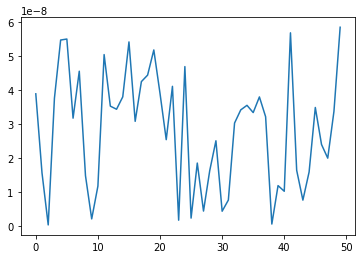

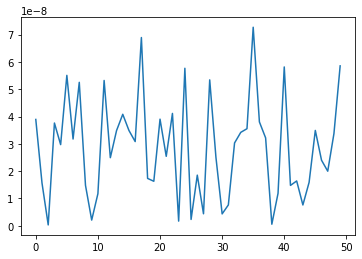

In [35]:
riemann_plot(2, 50, float32)

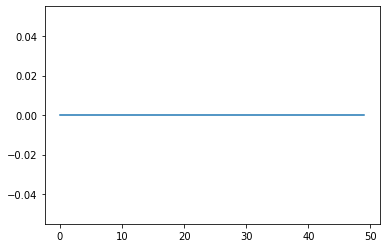

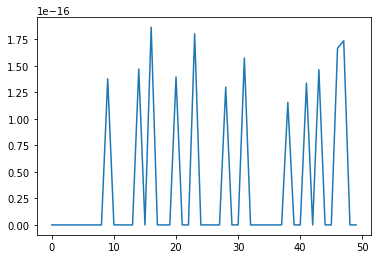

In [36]:
riemann_plot(2, 50, float)

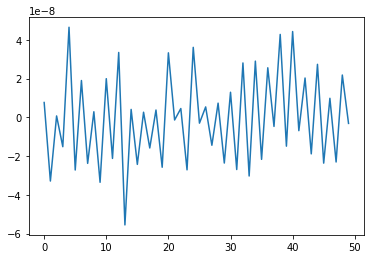

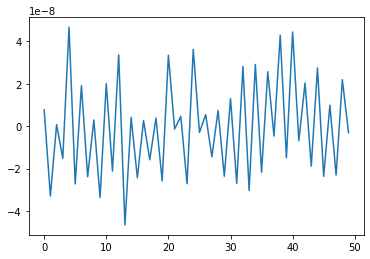

In [37]:
dirichlet_plot(2, 50, float32)

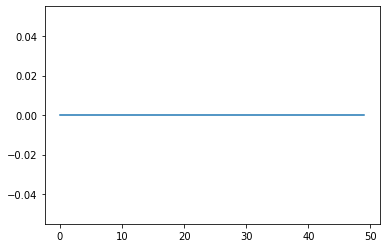

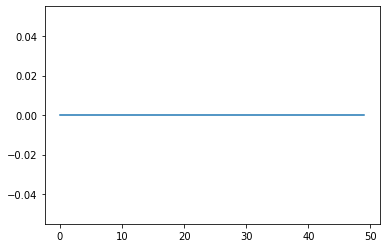

In [39]:
dirichlet_plot(2, 50, float)

#  Błędy zaokrągleń i odwzorowanie logistyczne

In [43]:
from numpy import arange

N = 1000

def x_N(x_0, r, function):
    tab = [function(x_0)]
    r = function(r)
    for i in range(0, N):
        tab.append(function(r * tab[i] * (1 - tab[i])))
    return tab

In [49]:
def a(how_many):

    for x_0 in arange(0.1, 1, 0.2):
        for r in arange(1, 4, 0.01):
            tab = x_N(x_0, r, float32)
            for i in (N - how_many, N):
                plt.plot(r, tab[i], '.', markersize=2)
        plt.title(x_0)
        plt.show()


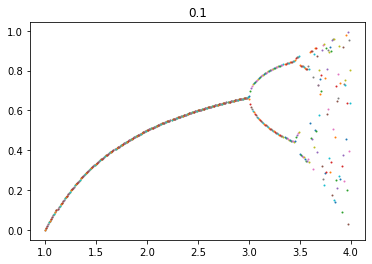

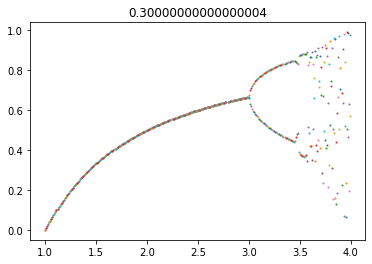

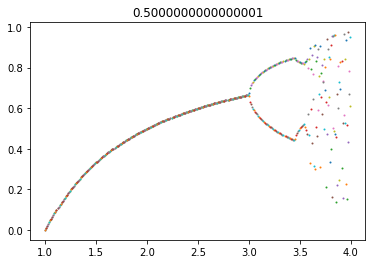

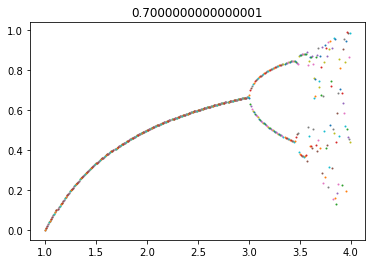

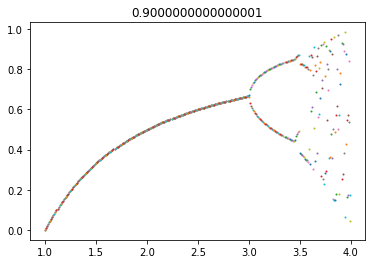

In [50]:
a(1)

Powyższe wykresy przedstawiają zachowanie ciągu rekurencyjnego po wielu iteracjach dla różnych wartości x0 (oś pionowa). Na osi poziomej zaznaczone są wartości parametru r. Zbieżność rozważanego odwzorowania logistycznego jest silnie zależna od przyjętej wartości r, a od wartości $x_0$ zależy w bardzo małym stopniu.

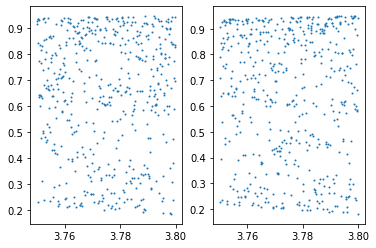

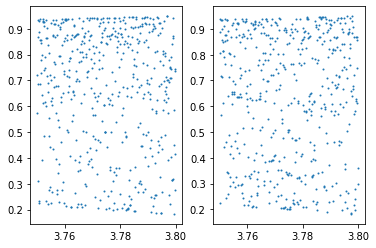

In [60]:
def b():
    R = []
    for r in arange(3.75, 3.8, 0.0001):
        R.append(r)
    for x_0 in [0.4, 0.8]:
        xN32 = []
        xN64 = []
        for r in R:
            xN32.append(x_N(x_0, r, float32)[N - 1])
            xN64.append(x_N(x_0, r, float)[N - 1])
        plt.subplot(1, 2, 1)
        plt.plot(R, xN32, '.', markersize=2)
        plt.subplot(1, 2, 2)
        plt.plot(R, xN64, '.', markersize=2)
        plt.show()
b()

Powyższe wykresy przedstawiają diagram bifurkacyjny dla $r \in [3.75, 3.8]$ dla liczb pojedynczej i podwójnej precyzji. Jaki widać wykresy różnią się od siebie w zależności od użytej precyzji.

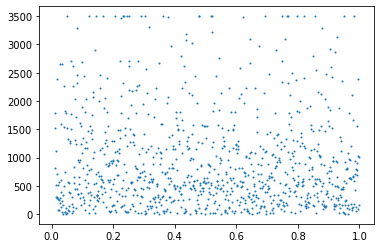

In [68]:
def c():
    r = float32(4)
    eps = 1e-5

    iterations = []
    for x_0 in arange(0.01, 1, 0.001):
        tab = [float32(x_0)]
        i = 0
        while tab[i] > eps and i < 3500:
            tab.append(r * tab[i] * (1 - tab[i]))
            i = i + 1
        iterations.append(i)
    plt.plot(arange(0.01, 1, 0.001), iterations, '.', markersize=2)
    plt.show()
c()

Jak widać na powyższym wykresie liczba 0 jest przeważnie osiągana stosunkowo szybko. Większość wyników jest mniejsza niż 1500 operacji.